In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("Housing_data.csv")

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [44]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X

array([[7420,    4,    2,    3,    2],
       [8960,    4,    4,    4,    3],
       [9960,    3,    2,    2,    2],
       ...,
       [3620,    2,    1,    1,    0],
       [2910,    3,    1,    1,    0],
       [3850,    3,    1,    2,    0]], dtype=int64)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
print(X_train)
X_test = sc_X.fit_transform(X_test)
print(X_test)

[[-1.55021716 -1.35446064 -0.57931017  0.18542633 -0.82872033]
 [ 0.09760377  0.06251357 -0.57931017 -0.94373698 -0.82872033]
 [-1.05087748 -1.35446064 -0.57931017 -0.94373698 -0.82872033]
 ...
 [ 0.32230663  0.06251357  1.47598157  2.44375293  0.30972376]
 [-0.75127368  0.06251357 -0.57931017 -0.94373698  0.30972376]
 [ 0.74674535  0.06251357 -0.57931017 -0.94373698 -0.82872033]]
[[-0.49625938  0.00885962 -0.54886654  0.35539826  0.51261937]
 [ 1.6698448   0.00885962 -0.54886654 -0.89305203  1.76670603]
 [-0.70439039  1.2226281  -0.54886654  0.35539826 -0.7414673 ]
 [ 3.04967629 -1.20490885 -0.54886654 -0.89305203  0.51261937]
 [-0.62730483  1.2226281  -0.54886654  0.35539826 -0.7414673 ]
 [ 0.40949593  0.00885962  1.28515093  1.60384855 -0.7414673 ]
 [-0.55407355  0.00885962 -0.54886654 -0.89305203  1.76670603]
 [-0.69668183  0.00885962 -0.54886654  0.35539826  0.51261937]
 [-0.68434814 -1.20490885 -0.54886654 -0.89305203  0.51261937]
 [ 1.43087957  1.2226281   1.28515093  2.85229885

In [47]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [48]:
y_pred = classifier.predict(X_test)
y_pred

array([4200000, 4200000, 4200000, 5600000, 4200000, 4200000, 4200000,
       4200000, 3500000, 8400000, 5600000, 4200000, 4200000, 4900000,
       4900000, 3500000, 3500000, 4900000, 4200000, 4200000, 5250000,
       5250000, 4200000, 4200000, 5600000, 4200000, 4200000, 4200000,
       4200000, 4900000, 3500000, 4200000, 4200000, 3500000, 4200000,
       4200000, 4480000, 4200000, 3360000, 4200000, 8400000, 4200000,
       5600000, 4900000, 4200000, 6650000, 3500000, 3500000, 4200000,
       4200000, 4200000, 5950000, 4200000, 3500000, 4200000, 3500000,
       5600000, 4200000, 3360000, 4200000, 5250000, 5250000, 4200000,
       7350000, 3500000, 4200000, 4200000, 3500000, 4900000, 4200000,
       4200000, 7350000, 3500000, 4200000, 3500000, 3500000, 4340000,
       8400000, 3500000, 3500000, 4200000, 4900000, 4200000, 4200000,
       4200000, 4200000, 3500000, 3500000, 4200000, 4200000, 4900000,
       4200000, 3360000, 2660000, 4200000, 4200000, 4200000, 5600000,
       3500000, 3500

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

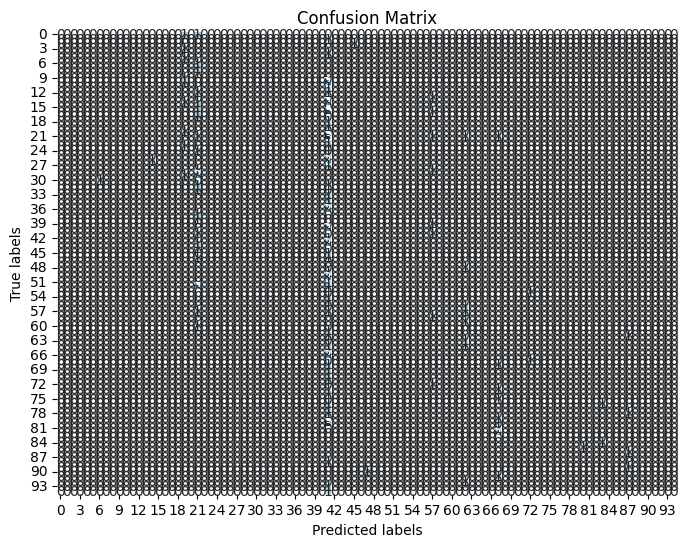

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Evaluation metrics for RBF Kernel:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Evaluation metrics for Linear Kernel:
Accuracy: 0.0072992700729927005
Precision: 0.001965188096574958
Recall: 0.0072992700729927005
F1-score: 0.0030966600309666006
